### Support Vector Classifier and Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [3]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [4]:
from sklearn import svm

from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve

In [5]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV

## class_A Dataset - Classification

In [6]:
class_data = pd.read_csv("Data/class_A.csv", na_values='?').drop(['Unnamed: 0'], axis = 1).dropna()
class_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,Response
0,-0.688345,-1.075180,-0.873586,-1.701409,-0.475668,-0.337594,6.458754,2.522792,-2.704778,-0.313492,0.913817,-2.204570,1
1,-0.948226,1.890486,0.823396,-5.157182,-0.011269,0.850086,-4.276484,0.251554,0.384607,-0.338518,5.234188,1.289072,2
2,-0.591366,1.265194,-0.135395,-3.817360,-0.388317,3.953922,-2.223434,0.057389,-0.280091,-2.596458,0.446851,2.000516,2
3,-3.754970,5.348505,0.551291,4.557593,3.180973,-4.178560,7.251974,5.981264,-0.453378,1.017465,-0.819630,-2.480946,0
4,-0.451108,-2.828674,0.811837,-7.326255,0.291742,-0.479579,5.860254,-2.611893,0.278501,-4.525027,-0.047749,-3.127627,3


In [7]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x1        10000 non-null  float64
 1   x2        10000 non-null  float64
 2   x3        10000 non-null  float64
 3   x4        10000 non-null  float64
 4   x5        10000 non-null  float64
 5   x6        10000 non-null  float64
 6   x7        10000 non-null  float64
 7   x8        10000 non-null  float64
 8   x9        10000 non-null  float64
 9   x10       10000 non-null  float64
 10  x11       10000 non-null  float64
 11  x12       10000 non-null  float64
 12  Response  10000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1.1 MB


In [8]:
print("Unique classes obs. in feature I: %s" % (np.unique(np.array(class_data.Response))))

Unique classes obs. in feature I: [0 1 2 3 4]


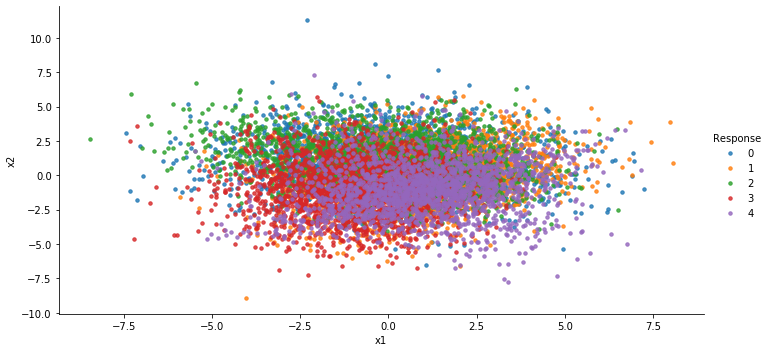

In [9]:
sns.lmplot(y = "x2", x = "x1", data = class_data, 
           hue = 'Response', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [10]:
X = class_data.drop(['Response'], axis = 1)
y = class_data['Response'].values

In [11]:
print("X has shapes: %s, y has shape: %s" % (X.shape, y.shape))

X has shapes: (10000, 12), y has shape: (10000,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [13]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (8000, 12), Test feature set shape: (2000, 12) 
Train set labels shape: (8000,), Test set labels shape: (2000,) 


### 1. Linear Support Vector Classification

In [14]:
# c_param_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
c_param_list = [0.01, 0.1, 1]

score_results_LinSVC = []

for val in c_param_list:
    mod_svm_lin = svm.LinearSVC(penalty = 'l2', C = val, max_iter = 100000) 
    kfold = KFold(n_splits=10)
    score = cross_val_score(mod_svm_lin, X_train, y_train, cv = kfold, scoring = "accuracy")
    score_results_LinSVC.append(score)
    print("C val: %s, CV Score Avg: %s " % (val, np.mean(score)))

C val: 0.01, CV Score Avg: 0.57625 
C val: 0.1, CV Score Avg: 0.576375 
C val: 1, CV Score Avg: 0.576125 


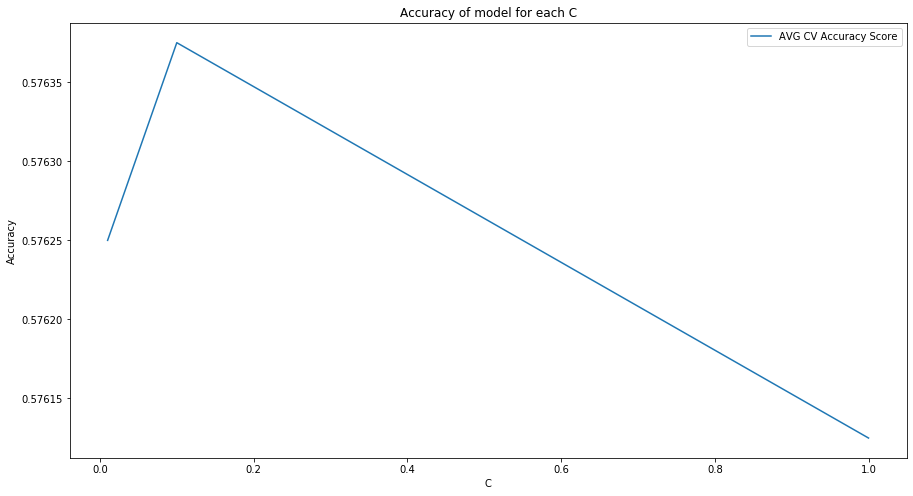

In [15]:
plt.figure(figsize = (15,8)) 
plt.plot(c_param_list, np.mean(np.array(score_results_LinSVC), axis = 1), label = "AVG CV Accuracy Score")
plt.title("Accuracy of model for each C")
plt.xlabel("C")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [16]:
avg_cv_scores = np.mean(np.array(score_results_LinSVC), axis = 1)
max_avg_accuracy_index = np.argmax(avg_cv_scores) 
print("Optimal Value of C: %s" % c_param_list[max_avg_accuracy_index]) # Note: So optimal lambda=1/C

Optimal Value of C: 0.1


In [17]:
opt_mod_svm_lin = CalibratedClassifierCV(svm.LinearSVC(penalty = 'l2', C = c_param_list[max_avg_accuracy_index], max_iter = 100000))
opt_mod_svl_lin_fit = opt_mod_svm_lin.fit(X_train, y_train)
opt_mod_svm_lin.fit(X_train, y_train)

y_pred_LinSVC = opt_mod_svm_lin.predict(X_test)
pred_prob_LinSVC = opt_mod_svl_lin_fit.predict_proba(X_test)

In [18]:
print(confusion_matrix(y_test, y_pred_LinSVC))

[[236  51  36  34  49]
 [ 66 164  63  24  97]
 [ 18  36 276  26  46]
 [ 25  36  23 266  24]
 [ 54  36  49  52 213]]


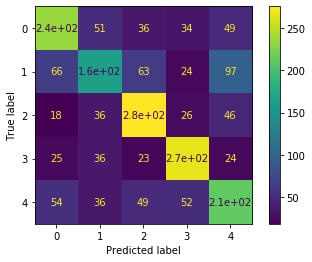

In [19]:
plot_confusion_matrix(opt_mod_svm_lin, X_test, y_test,  display_labels = np.array([0,1,2,3,4]))
plt.show()

In [20]:
print(classification_report(y_test, y_pred_LinSVC, digits = 6))

              precision    recall  f1-score   support

           0   0.591479  0.581281  0.586335       406
           1   0.507740  0.396135  0.445047       414
           2   0.617450  0.686567  0.650177       402
           3   0.661692  0.711230  0.685567       374
           4   0.496503  0.527228  0.511405       404

    accuracy                       0.577500      2000
   macro avg   0.574973  0.580488  0.575706      2000
weighted avg   0.573310  0.577500  0.573341      2000



In [21]:
fpr0_LinSVC, tpr0_LinSVC, thresholds0_LinSVC = roc_curve(y_test, pred_prob_LinSVC[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_LinSVC, tpr0_LinSVC))

fpr1_LinSVC, tpr1_LinSVC, thresholds1_LinSVC = roc_curve(y_test, pred_prob_LinSVC[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_LinSVC, tpr1_LinSVC))

fpr2_LinSVC, tpr2_LinSVC, thresholds2_LinSVC = roc_curve(y_test, pred_prob_LinSVC[:,2], pos_label = 2)
print("ROC: AUC Class 2: ", auc(fpr2_LinSVC, tpr2_LinSVC))

fpr3_LinSVC, tpr3_LinSVC, thresholds3_LinSVC = roc_curve(y_test, pred_prob_LinSVC[:,3], pos_label = 3)
print("ROC: AUC Class 3: ", auc(fpr3_LinSVC, tpr3_LinSVC))

fpr4_LinSVC, tpr4_LinSVC, thresholds4_LinSVC = roc_curve(y_test, pred_prob_LinSVC[:,4], pos_label = 4)
print("ROC: AUC Class 4: ", auc(fpr4_LinSVC, tpr4_LinSVC))


p0_LinSVC, r0_LinSVC, thresholds0_LinSVC = precision_recall_curve(y_test, pred_prob_LinSVC[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_LinSVC, p0_LinSVC))

p1_LinSVC, r1_LinSVC, thresholds1_LinSVC = precision_recall_curve(y_test, pred_prob_LinSVC[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_LinSVC, p1_LinSVC))

p2_LinSVC, r2_LinSVC, thresholds2_LinSVC = precision_recall_curve(y_test, pred_prob_LinSVC[:,2], pos_label = 2)
print("Precision-Recall: AUC Class 2:", auc(r2_LinSVC, p2_LinSVC))

p3_LinSVC, r3_LinSVC, thresholds3_LinSVC = precision_recall_curve(y_test, pred_prob_LinSVC[:,3], pos_label = 3)
print("Precision-Recall: AUC Class 3:", auc(r3_LinSVC, p3_LinSVC))

p4_LinSVC, r4_LinSVC, thresholds4_LinSVC = precision_recall_curve(y_test, pred_prob_LinSVC[:,4], pos_label = 4)
print("Precision-Recall: AUC Class 4:", auc(r4_LinSVC, p4_LinSVC))

ROC: AUC Class 0:  0.8229845912318979
ROC: AUC Class 1:  0.7634297080127443
ROC: AUC Class 2:  0.8757666610626467
ROC: AUC Class 3:  0.8927751576981011
ROC: AUC Class 4:  0.8314210650388347
Precision-Recall: AUC Class 1: 0.6360378938847145
Precision-Recall: AUC Class 1: 0.47274055634030787
Precision-Recall: AUC Class 2: 0.6851376587236667
Precision-Recall: AUC Class 3: 0.7751594590722757
Precision-Recall: AUC Class 4: 0.47468860918851813


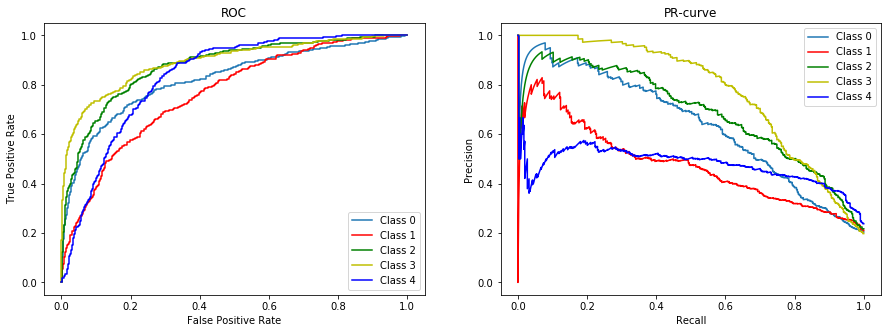

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_LinSVC, tpr0_LinSVC, "-", label = "Class 0")
plt.plot(fpr1_LinSVC, tpr1_LinSVC, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_LinSVC, tpr2_LinSVC, "-", color = 'g', label = "Class 2")
plt.plot(fpr3_LinSVC, tpr3_LinSVC, "-", color = 'y', label = "Class 3")
plt.plot(fpr4_LinSVC, tpr4_LinSVC, "-", color = 'b', label = "Class 4")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_LinSVC, p0_LinSVC, "-", label = "Class 0")
plt.plot(r1_LinSVC, p1_LinSVC, "-", color = 'r', label = "Class 1")
plt.plot(r2_LinSVC, p2_LinSVC, "-", color = 'g', label = "Class 2")
plt.plot(r3_LinSVC, p3_LinSVC, "-", color = 'y', label = "Class 3")
plt.plot(r4_LinSVC, p4_LinSVC, "-", color = 'b', label = "Class 4")
plt.title("PR-curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.show()

 ### 2. RBF (Radial Basis Function) Support Vector Classification

In [23]:
X_train = X_train[:100]
y_train = y_train[:100]

In [24]:
gamma_grid = np.linspace(0.0001, 1, 100)
c_param_grid = np.linspace(0.1, 100, 10)

mod_svm_radial = svm.SVC(kernel = "rbf")
opt_mod_svm_radial = GridSearchCV(mod_svm_radial, param_grid = {'C': c_param_grid,'gamma':gamma_grid}, cv = 10)
opt_mod_svm_radial_fit = opt_mod_svm_radial.fit(X_train, y_train)
opt_mod_svm_radial.fit(X_train, y_train)

print("Optimal Value of C: %s" % opt_mod_svm_radial.best_params_['C'])
print("Optimal Value of gamma: %s" % opt_mod_svm_radial.best_params_['gamma'])

Optimal Value of C: 44.50000000000001
Optimal Value of gamma: 0.0001


In [25]:
print("Model Best Estimator %s" % (opt_mod_svm_radial.best_estimator_))

Model Best Estimator SVC(C=44.50000000000001, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.0001,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [26]:
print("Model Best Params %s" % opt_mod_svm_radial.best_params_)

Model Best Params {'C': 44.50000000000001, 'gamma': 0.0001}


In [27]:
opt_mod_svm_rbf = CalibratedClassifierCV(
    svm.SVC(kernel = "rbf", C = 44.5, gamma = 0.0001, max_iter = 100000)).fit(X_test, y_test)

y_pred_rbfSVC = opt_mod_svm_rbf.predict(X_test)
pred_prob_rbfSVC = opt_mod_svm_rbf.predict_proba(X_test)

In [28]:
print(confusion_matrix(y_test, y_pred_rbfSVC))

[[270  41  29  22  44]
 [ 40 218  45  19  92]
 [ 21  27 284  18  52]
 [ 26  37  24 257  30]
 [ 41  27  35  33 268]]


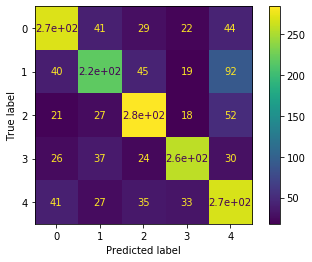

In [29]:
plot_confusion_matrix(opt_mod_svm_rbf, X_test, y_test,  display_labels = np.array([0,1,2,3,4]))
plt.show()

In [30]:
print(classification_report(y_test, y_pred_rbfSVC, digits = 6))

              precision    recall  f1-score   support

           0   0.678392  0.665025  0.671642       406
           1   0.622857  0.526570  0.570681       414
           2   0.681055  0.706468  0.693529       402
           3   0.736390  0.687166  0.710927       374
           4   0.551440  0.663366  0.602247       404

    accuracy                       0.648500      2000
   macro avg   0.654027  0.649719  0.649805      2000
weighted avg   0.652633  0.648500  0.648471      2000



In [31]:
fpr0_rbfSVC, tpr0_rbfSVC, thresholds0_rbfSVC = roc_curve(y_test, pred_prob_rbfSVC[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_rbfSVC, tpr0_rbfSVC))

fpr1_rbfSVC, tpr1_rbfSVC, thresholds1_rbfSVC = roc_curve(y_test, pred_prob_rbfSVC[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_rbfSVC, tpr1_rbfSVC))

fpr2_rbfSVC, tpr2_rbfSVC, thresholds2_rbfSVC = roc_curve(y_test, pred_prob_rbfSVC[:,2], pos_label = 2)
print("ROC: AUC Class 2: ", auc(fpr2_rbfSVC, tpr2_rbfSVC))

fpr3_rbfSVC, tpr3_rbfSVC, thresholds3_rbfSVC = roc_curve(y_test, pred_prob_rbfSVC[:,3], pos_label = 3)
print("ROC: AUC Class 3: ", auc(fpr3_rbfSVC, tpr3_rbfSVC))

fpr4_rbfSVC, tpr4_rbfSVC, thresholds4_rbfSVC = roc_curve(y_test, pred_prob_rbfSVC[:,4], pos_label = 4)
print("ROC: AUC Class 4: ", auc(fpr4_rbfSVC, tpr4_rbfSVC))


p0_rbfSVC, r0_rbfSVC, thresholds0_rbfSVC = precision_recall_curve(y_test, pred_prob_rbfSVC[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_rbfSVC, p0_rbfSVC))

p1_rbfSVC, r1_rbfSVC, thresholds1_rbfSVC = precision_recall_curve(y_test, pred_prob_rbfSVC[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_rbfSVC, p1_rbfSVC))

p2_rbfSVC, r2_rbfSVC, thresholds2_rbfSVC = precision_recall_curve(y_test, pred_prob_rbfSVC[:,2], pos_label = 2)
print("Precision-Recall: AUC Class 2:", auc(r2_rbfSVC, p2_rbfSVC))

p3_rbfSVC, r3_rbfSVC, thresholds3_rbfSVC = precision_recall_curve(y_test, pred_prob_rbfSVC[:,3], pos_label = 3)
print("Precision-Recall: AUC Class 3:", auc(r3_rbfSVC, p3_rbfSVC))

p4_rbfSVC, r4_rbfSVC, thresholds4_rbfSVC = precision_recall_curve(y_test, pred_prob_rbfSVC[:,4], pos_label = 4)
print("Precision-Recall: AUC Class 4:", auc(r4_rbfSVC, p4_rbfSVC))

ROC: AUC Class 0:  0.8479921627284583
ROC: AUC Class 1:  0.8077166754999969
ROC: AUC Class 2:  0.8876736467848493
ROC: AUC Class 3:  0.8892298281271583
ROC: AUC Class 4:  0.8461484776297179
Precision-Recall: AUC Class 1: 0.6514995038434784
Precision-Recall: AUC Class 1: 0.5024049279082351
Precision-Recall: AUC Class 2: 0.6783679761117541
Precision-Recall: AUC Class 3: 0.7213460134280305
Precision-Recall: AUC Class 4: 0.51256490182789


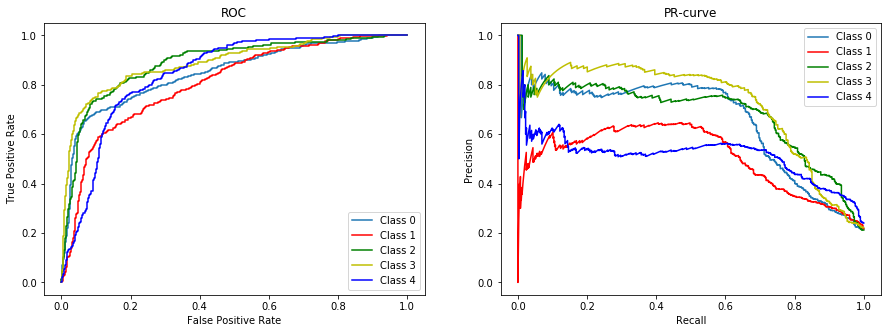

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_rbfSVC, tpr0_rbfSVC, "-", label = "Class 0")
plt.plot(fpr1_rbfSVC, tpr1_rbfSVC, "-", color = 'r', label = "Class 1")
plt.plot(fpr2_rbfSVC, tpr2_rbfSVC, "-", color = 'g', label = "Class 2")
plt.plot(fpr3_rbfSVC, tpr3_rbfSVC, "-", color = 'y', label = "Class 3")
plt.plot(fpr4_rbfSVC, tpr4_rbfSVC, "-", color = 'b', label = "Class 4")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_rbfSVC, p0_rbfSVC, "-", label = "Class 0")
plt.plot(r1_rbfSVC, p1_rbfSVC, "-", color = 'r', label = "Class 1")
plt.plot(r2_rbfSVC, p2_rbfSVC, "-", color = 'g', label = "Class 2")
plt.plot(r3_rbfSVC, p3_rbfSVC, "-", color = 'y', label = "Class 3")
plt.plot(r4_rbfSVC, p4_rbfSVC, "-", color = 'b', label = "Class 4")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

## 3. Support Vector Regression (kernel='poly')

In [36]:
degree_grid = np.array([1,2,3,4])
c_param_grid = np.linspace(0.1, 100, 10)
epsilon_grid = np.linspace(0,1,10)


mod_svm_radial_reg = svm.SVR(kernel = "poly")
opt_mod_svm_radial_reg = GridSearchCV(mod_svm_radial_reg, 
                             param_grid = {'degree': degree_grid, 'C': c_param_grid, 'epsilon': epsilon_grid}, 
                             cv = 10)
opt_mod_svm_radial_reg_fit = opt_mod_svm_radial_reg.fit(X_train,y_train)
opt_mod_svm_radial_reg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  0.1,  11.2,  22.3,  33.4,  44.5,  55.6,  66.7,  77.8,  88.9,
       100. ]),
                         'degree': array([1, 2, 3, 4]),
                         'epsilon': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
print("Model Best Estimator %s" % opt_mod_svm_radial_reg.best_estimator_)

Model Best Estimator SVR(C=0.1, cache_size=200, coef0=0.0, degree=1, epsilon=0.0, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [40]:
print("Model score %s" % opt_mod_svm_radial_reg.best_estimator_.score(X_test, y_test))

Model score 0.13497841148976075


In [41]:
print("Model Best Params %s" % opt_mod_svm_radial_reg.best_params_)

Model Best Params {'C': 0.1, 'degree': 1, 'epsilon': 0.0}


***